In [7]:
import rasterio

with rasterio.open("mrlc/mrlc_pasture_2000_1km.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)
    print("Shape (rows, cols):", src.height, src.width)
    print("Data type:", src.dtypes)
    print("Nodata value:", src.nodata)


CRS: EPSG:5070
Bounds: BoundingBox(left=-2356113.742898011, bottom=270567.9206071561, right=2257886.257101989, top=3172567.920607156)
Resolution: (1000.0, 1000.0)
Shape (rows, cols): 2902 4614
Data type: ('uint8',)
Nodata value: None


In [14]:
with rasterio.open("USA_1km_raster.tif") as usa:
    arr = usa.read(1)
    print("USA unique:", np.unique(arr))

NameError: name 'np' is not defined

In [8]:
import rasterio

with rasterio.open("allotment/allotment_2000.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)
    print("Shape (rows, cols):", src.height, src.width)
    print("Data type:", src.dtypes)
    print("Nodata value:", src.nodata)


CRS: EPSG:5070
Bounds: BoundingBox(left=-2356113.742898011, bottom=270567.9206071561, right=2257886.257101989, top=3172567.920607156)
Resolution: (1000.0, 1000.0)
Shape (rows, cols): 2902 4614
Data type: ('uint8',)
Nodata value: None


In [ ]:
import rasterio

with rasterio.open("allotment/allotment_2000.tif") as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Resolution:", src.res)
    print("Shape (rows, cols):", src.height, src.width)
    print("Data type:", src.dtypes)
    print("Nodata value:", src.nodata)

In [3]:
import numpy as np

with rasterio.open("allotment/allotment_2000.tif") as src:
    data = src.read(1)
    print("Min:", np.nanmin(data))
    print("Max:", np.nanmax(data))
    print("Unique values (sample):", np.unique(data[~np.isnan(data)])[:20])


Min: 0
Max: 1
Unique values (sample): [0 1]


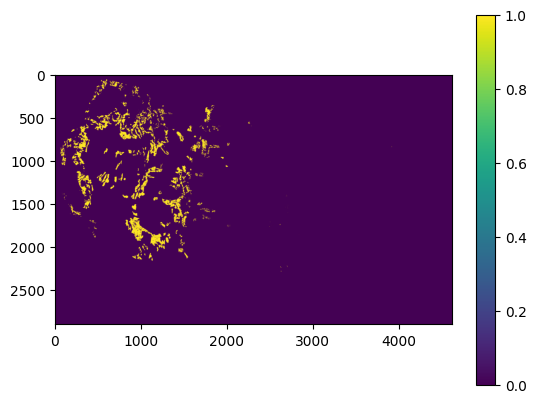

In [17]:
import rasterio
import matplotlib.pyplot as plt

fp = "mrlc/mrlc_pasture_2000_1km.tif"
fp = "pasture_presence/pasture_presence_2007.tif"
fp = "cattle_rasters/cattle_2002_1km.tif"
fp = "mrlc/mrlc_pasture_2005_1km.tif"

fp = "pasture_presence/pasture_presence_2007.tif"
fp = "allotment/allotment_2007.tif"
with rasterio.open(fp) as src:
    arr = src.read(1)
    plt.imshow(arr, cmap="viridis")  # or "Greens", "Blues"
    plt.colorbar()
    plt.show()

In [ ]:
outside = (data == 0) | np.isnan(data)
print("Percent masked:", outside.sum() / data.size * 100)


EPSG:5070 (1000.0, 1000.0) BoundingBox(left=-2356113.742898011, bottom=270567.9206071561, right=2257886.257101989, top=3172567.920607156) (2902, 4614)


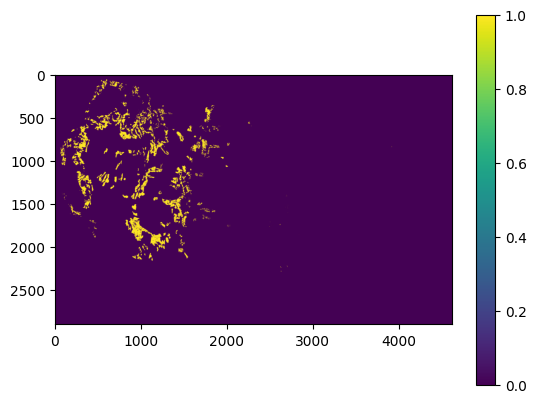

In [23]:
import rasterio
import matplotlib.pyplot as plt

fp = "./processed_cattle/cattle_2006_processed.tif"  # example

fp = "./processed_allotment/allotment_2013_processed.tif"
fp = "./processed_cattle/cattle_2005_processed.tif"
fp = "./processed_allotment/allotment_2013_processed.tif"
with rasterio.open(fp) as src:
    print(src.crs, src.res, src.bounds, src.shape)
    arr = src.read(1)

plt.imshow(arr, cmap="viridis")
plt.colorbar()
plt.show()


In [24]:
import geopandas as gpd
from rasterio.plot import show
import rasterio

# check cattle shapefile
gdf = gpd.read_file("./cattle_shapefile/cattle_2005.shp")
print("CRS:", gdf.crs)
print("Bounds:", gdf.total_bounds)
print(gdf.head())

# check template raster
with rasterio.open("USA_1km_raster.tif") as src:
    print("Template CRS:", src.crs)
    print("Template bounds:", src.bounds)
    show(src)


DataSourceError: './cattle_rasters/cattle_2012_1km.tif' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

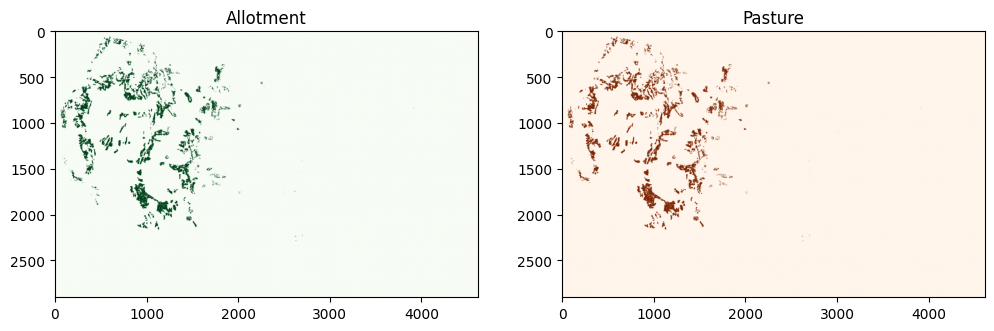

In [20]:
import matplotlib.pyplot as plt
import rasterio

def quick_compare(raster1, raster2, title1="Layer 1", title2="Layer 2"):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    with rasterio.open(raster1) as r1:
        arr1 = r1.read(1)
        axes[0].imshow(arr1, cmap="Greens")
        axes[0].set_title(title1)

    with rasterio.open(raster2) as r2:
        arr2 = r2.read(1)
        axes[1].imshow(arr2, cmap="Oranges")
        axes[1].set_title(title2)

    plt.show()

quick_compare(
    "./processed_allotment/allotment_2010_processed.tif",
    "./pasture_presence/pasture_presence_2010.tif",
    "Allotment",
    "Pasture"
)


In [22]:
import rasterio, numpy as np
a = rasterio.open("processed_allotment/allotment_2000_processed.tif").read(1)
p = rasterio.open("pasture_presence/pasture_presence_2000.tif").read(1)

print("Allotment unique:", np.unique(a))
print("Pasture unique:", np.unique(p))

overlap = np.sum((a>0) & (p>0))
only_allot = np.sum((a>0) & (p==0))
only_past = np.sum((p>0) & (a==0))
print("Overlap cells:", overlap)
print("Allotment only:", only_allot)
print("Pasture only:", only_past)


Allotment unique: [0 1]
Pasture unique: [0 1]
Overlap cells: 334357
Allotment only: 14753
Pasture only: 737
